<a href="https://colab.research.google.com/github/vickyrana123/100-sales-record-analysis/blob/main/100_sales_record_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data=pd.read_excel('100 Sales Records.xlsx')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,NaN,524.96,3296425.02,2657347.52,639077.50


In [ ]:
df=pd.DataFrame(data)
df.head(10)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,NaN,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,NaN,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20
9,Sub-Saharan Africa,Senegal,Cereal,Online,H,4/18/2014,616607081,5/30/2014,6593,205.70,117.11,1356180.10,772106.23,584073.87


In [ ]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [ ]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
df[:].isna().any()

Region            False
Country           False
Item Type         False
Sales Channel      True
Order Priority     True
Order Date        False
Order ID          False
Ship Date         False
Units Sold        False
Unit Price         True
Unit Cost         False
Total Revenue     False
Total Cost        False
Total Profit      False
dtype: bool

In [ ]:
df.isna()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head(9)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,NaN,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,NaN,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20


In [ ]:
df['Sales Channel'].fillna('offline',inplace=True)
df['Order Priority'].fillna('L',inplace=True)
df['Unit Price']=np.where(df['Item Type']=='Household',668.27,df['Unit Price'])
df['Unit Price']=np.where(df['Item Type']=='Office Supplies',651.21,df['Unit Price'])
df['Unit Price']=np.where(df['Item Type']=='Clothes',109.28,df['Unit Price'])
df.head(9)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
5,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2/4/2015,547995746,2/21/2015,2974,255.28,159.42,759202.72,474115.08,285087.64
6,Sub-Saharan Africa,Angola,Household,Offline,M,4/23/2011,135425221,4/27/2011,4187,668.27,502.54,2798046.49,2104134.98,693911.51
7,Sub-Saharan Africa,Burkina Faso,Vegetables,Online,H,7/17/2012,871543967,7/27/2012,8082,154.06,90.93,1245112.92,734896.26,510216.66
8,Sub-Saharan Africa,Republic of the Congo,Personal Care,offline,M,7/14/2015,770463311,8/25/2015,6070,81.73,56.67,496101.10,343986.90,152114.20


In [ ]:
df[:].isna().any()

Region            False
Country           False
Item Type         False
Sales Channel     False
Order Priority    False
Order Date        False
Order ID          False
Ship Date         False
Units Sold        False
Unit Price        False
Unit Cost         False
Total Revenue     False
Total Cost        False
Total Profit      False
dtype: bool

In [ ]:
data.shape

(100, 14)

In [ ]:
np.corrcoef(data.loc[:,'Total Revenue'].iloc[:],data.loc[:,'Total Profit'].iloc[:])

array([[1.        , 0.89732687],
       [0.89732687, 1.        ]])

In [ ]:
data.cov()

<ipython-input-19-72e63cb34c7c>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.cov()


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,6.792031e+16,-1.623398e+11,-1.172359e+10,-1.045747e+10,-1.197405e+14,-9.292378e+13,-2.681668e+13
Units Sold,-1.623398e+11,7.809144e+06,-4.640481e+04,-4.850918e+04,1.826973e+09,1.135124e+09,6.918495e+08
Unit Price,-1.172359e+10,-4.640481e+04,5.550370e+04,4.377593e+04,2.587902e+08,2.012054e+08,5.758482e+07
Unit Cost,-1.045747e+10,-4.850918e+04,4.377593e+04,3.542232e+04,1.966455e+08,1.580833e+08,3.856216e+07
Total Revenue,-1.197405e+14,1.826973e+09,2.587902e+08,1.966455e+08,2.131684e+12,1.557145e+12,5.745386e+11
Total Cost,-9.292378e+13,1.135124e+09,2.012054e+08,1.580833e+08,1.557145e+12,1.174922e+12,3.822231e+11
Total Profit,-2.681668e+13,6.918495e+08,5.758482e+07,3.856216e+07,5.745386e+11,3.822231e+11,1.923155e+11


In [ ]:
data.corr(method='pearson')

<ipython-input-20-c50c7eb58c83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.314688,-0.328944,-0.234638
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.447784,0.374746,0.564550
Unit Price,-0.190941,-0.070486,1.000000,0.987270,0.752360,0.787905,0.557365
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,0.715623,0.774895,0.467214
Total Revenue,-0.314688,0.447784,0.752360,0.715623,1.000000,0.983928,0.897327
Total Cost,-0.328944,0.374746,0.787905,0.774895,0.983928,1.000000,0.804091
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.897327,0.804091,1.000000


In [ ]:
print("Average profit:",np.average(data['Total Profit']))
print("Average Revenue:",np.average(data['Total Revenue']))

Average profit: 441681.98399999994
Average Revenue: 1373487.6831


In [ ]:
print("Maximum profit:",np.max(data['Total Profit']))
print("Maximum revenue:",np.max(data['Total Revenue']))

Maximum profit: 1719922.04
Maximum revenue: 5997054.98


In [ ]:
print("Minimum profit:",np.min(data['Total Profit']))
print("Minimum revenue:",np.min(data['Total Revenue']))

Minimum profit: 1258.02
Minimum revenue: 4870.26


In [ ]:
print("Variance:",np.var(data['Total Profit']))
print("Variance:",np.var(data['Total Revenue']))

Variance: 190392340968.9648
Variance: 2110366986501.2168


In [ ]:
print("Standard deviation:",np.std(data['Total Revenue']))
print("Median:",np.median(data['Total Revenue']))
print("Percentile:",np.percentile(data['Total Revenue'],50,axis=0,overwrite_input=True))

Standard deviation: 1452710.2211044077
Median: 752314.36
Percentile: 752314.36


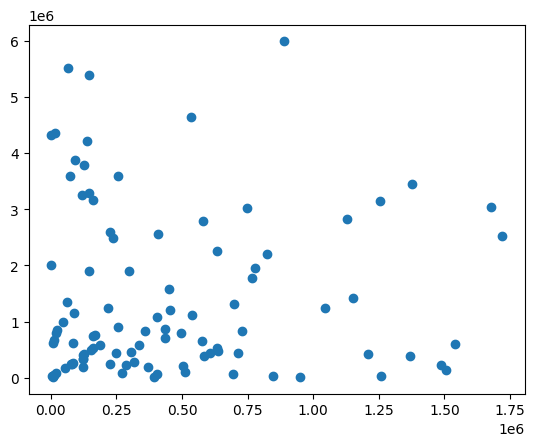

In [ ]:
plt.scatter(data['Total Profit'],data['Total Revenue'])

(array([44., 18.,  8.,  6.,  6.,  9.,  2.,  4.,  1.,  2.]),
 array([4.87026000e+03, 6.04088732e+05, 1.20330720e+06, 1.80252568e+06,
        2.40174415e+06, 3.00096262e+06, 3.60018109e+06, 4.19939956e+06,
        4.79861804e+06, 5.39783651e+06, 5.99705498e+06]),
 <BarContainer object of 10 artists>)

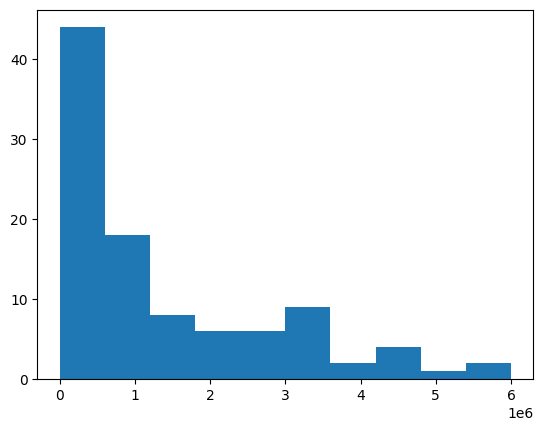

In [ ]:
plt.hist(data['Total Revenue'])

In [ ]:
np.correlate(data['Total Revenue'],data['Total Profit'])

array([6.25562019e+13])

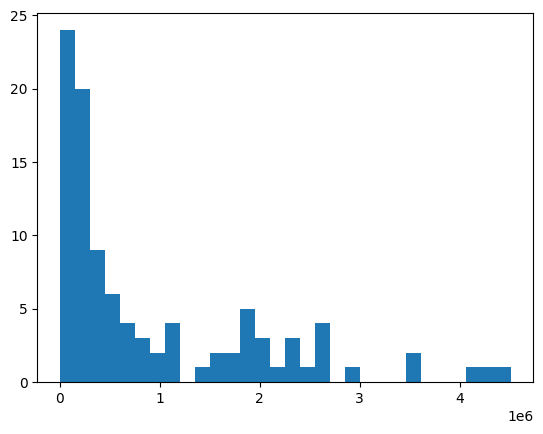

In [ ]:
plt.hist(data['Total Cost'],bins=30)
plt.show()

In [ ]:
data.corr(method='pearson')

<ipython-input-31-c50c7eb58c83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='pearson')


,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Order ID,1.000000,-0.222907,-0.190941,-0.213201,-0.067561,-0.328944,-0.234638
Units Sold,-0.222907,1.000000,-0.070486,-0.092232,0.080251,0.374746,0.564550
Unit Price,-0.190941,-0.070486,1.000000,0.987270,-0.039956,0.787905,0.557365
Unit Cost,-0.213201,-0.092232,0.987270,1.000000,-0.046198,0.774895,0.467214
Total Revenue,-0.067561,0.080251,-0.039956,-0.046198,1.000000,-0.021539,0.029844
Total Cost,-0.328944,0.374746,0.787905,0.774895,-0.021539,1.000000,0.804091
Total Profit,-0.234638,0.564550,0.557365,0.467214,0.029844,0.804091,1.000000


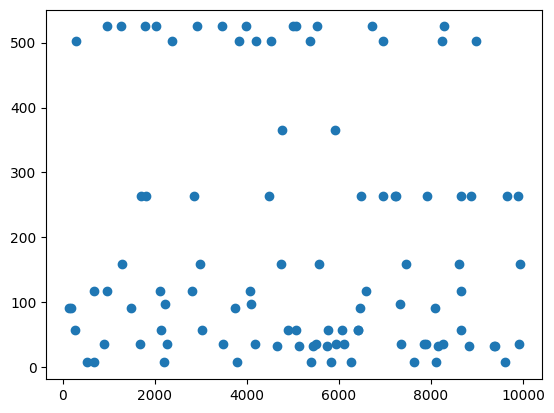

In [ ]:
plt.scatter(data['Units Sold'],data['Unit Cost'])

(array([41.,  9., 14.,  0., 13.,  0.,  2.,  0.,  0., 21.]),
 array([  6.92 ,  58.724, 110.528, 162.332, 214.136, 265.94 , 317.744,
        369.548, 421.352, 473.156, 524.96 ]),
 <BarContainer object of 10 artists>)

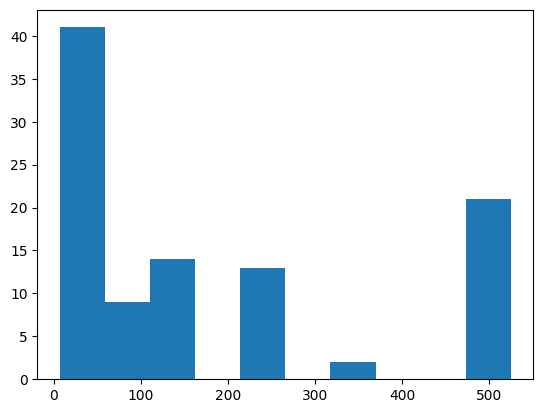

In [ ]:
plt.hist(data['Unit Cost'])

In [ ]:
print("Minimum:",np.min(data['Unit Cost']))
print("Maximum:",np.max(data['Unit Cost']))
print("Mean:",np.mean(data['Unit Cost']))
print("Standard deviation:",np.std(data['Unit Cost']))
print("Variance:",np.var(data['Unit Cost']))
print("Median:",np.median(data['Unit Cost']))

Minimum: 6.92
Maximum: 524.96
Mean: 191.048
Standard deviation: 187.26477590299785
Variance: 35068.096294
Median: 107.275


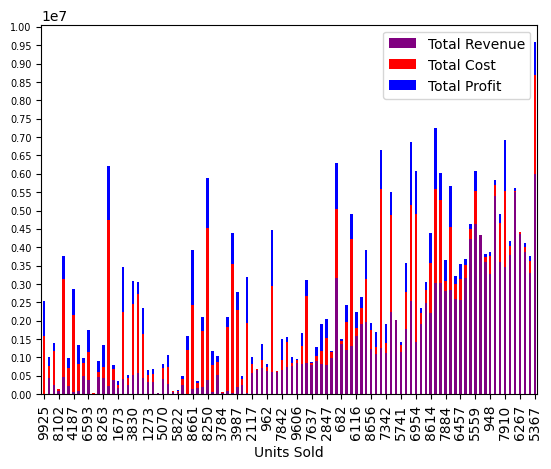

In [ ]:
bar_plot = data.plot.bar(x='Units Sold',y=['Total Revenue','Total Cost','Total Profit'],color=['purple','red','blue'],stacked=True,rot=True)
plt.xticks(rotation=90)
plt.locator_params(nbins=38)
plt.tick_params(axis='y', which='major', labelsize=7)

Text(0.5, 0, 'Total Revenue')

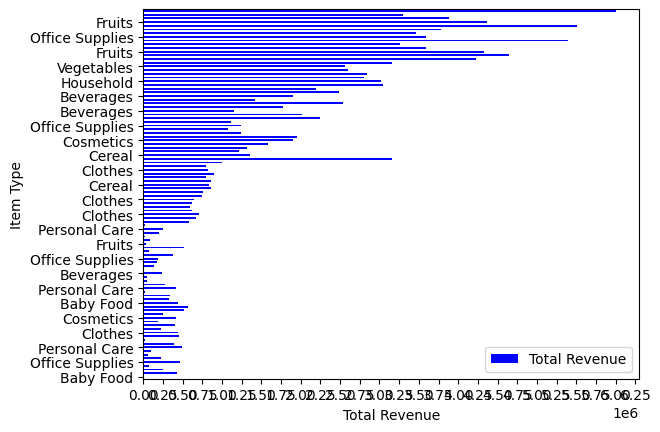

In [ ]:
data.plot.barh(x='Item Type',y='Total Revenue',color='blue')
plt.locator_params(nbins=28)
plt.xlabel('Total Revenue')

In [ ]:
data['Item Type'].unique()

array(['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks'], dtype=object)

In [ ]:
items = ['Baby Food', 'Cereal', 'Office Supplies', 'Fruits', 'Household',
       'Vegetables', 'Personal Care', 'Clothes', 'Cosmetics', 'Beverages',
       'Meat', 'Snacks']

<Axes: xlabel='Item Type'>

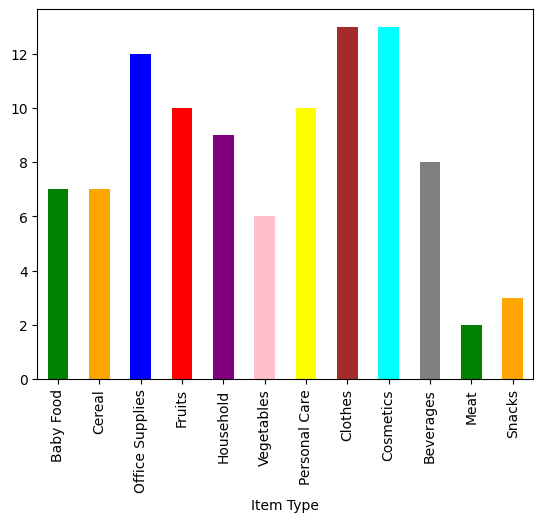

In [ ]:
data['Item Type'] = pd.Categorical(data['Item Type'],categories=items,ordered=True)
data.groupby('Item Type')['Total Revenue'].count().plot(kind='bar',color=['green','orange','blue','red','purple','pink','yellow','brown','aqua','grey'])

Text(0, 0.5, 'Total Revenue')

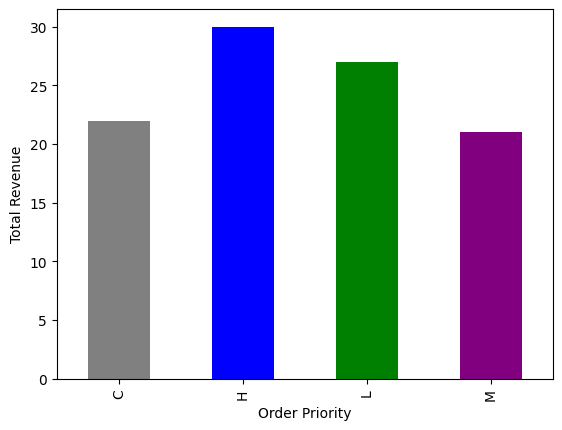

In [ ]:
data.groupby('Order Priority')['Total Revenue'].count().plot(kind='bar',color=['grey','blue','green','purple','brown'])
plt.ylabel('Total Revenue')

Text(0.5, 1.0, 'Distribution of profit on the basis of order priority')

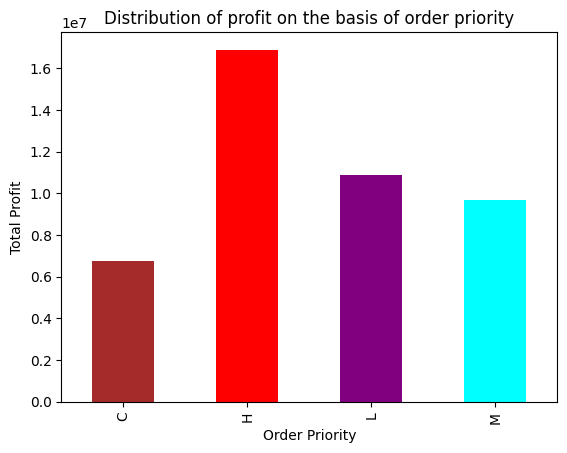

In [ ]:
data.groupby('Order Priority')['Total Profit'].sum().plot(kind='bar',color=['brown','red','purple','aqua'])
plt.ylabel('Total Profit')
plt.title('Distribution of profit on the basis of order priority')

<Axes: xlabel='Item Type'>

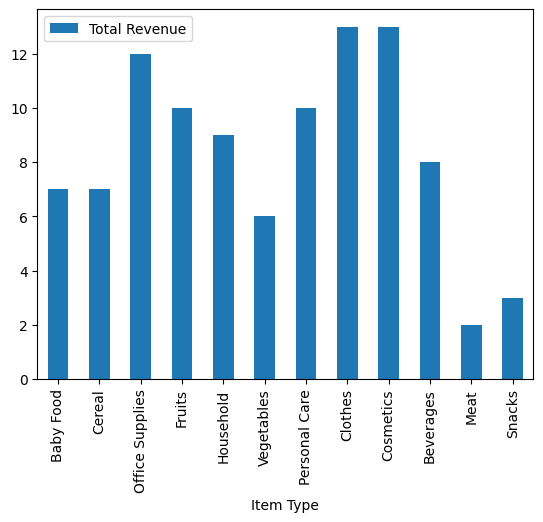

In [ ]:
pd.pivot_table(data,values='Total Revenue',index='Item Type',aggfunc='count').plot(kind='bar')

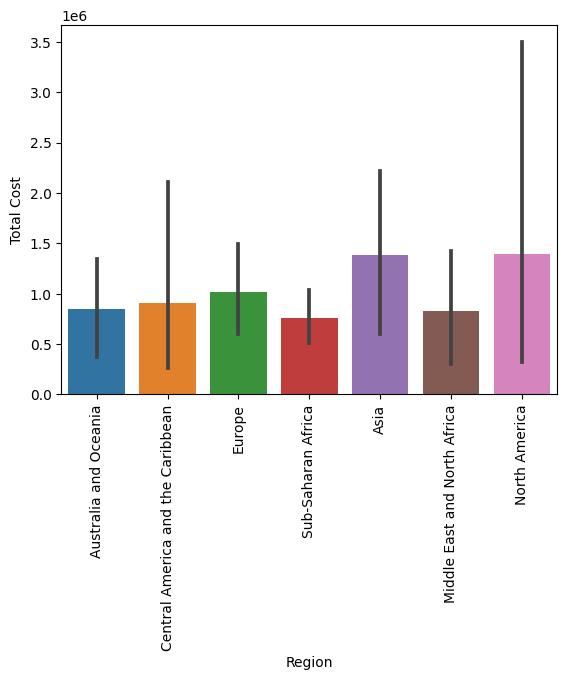

In [ ]:
sns.barplot(x='Region',y='Total Cost',data=data)
plt.xticks(rotation=90)
plt.show()

<ipython-input-44-601721b90030>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Country', y='Total Revenue', data=data, ci=None)


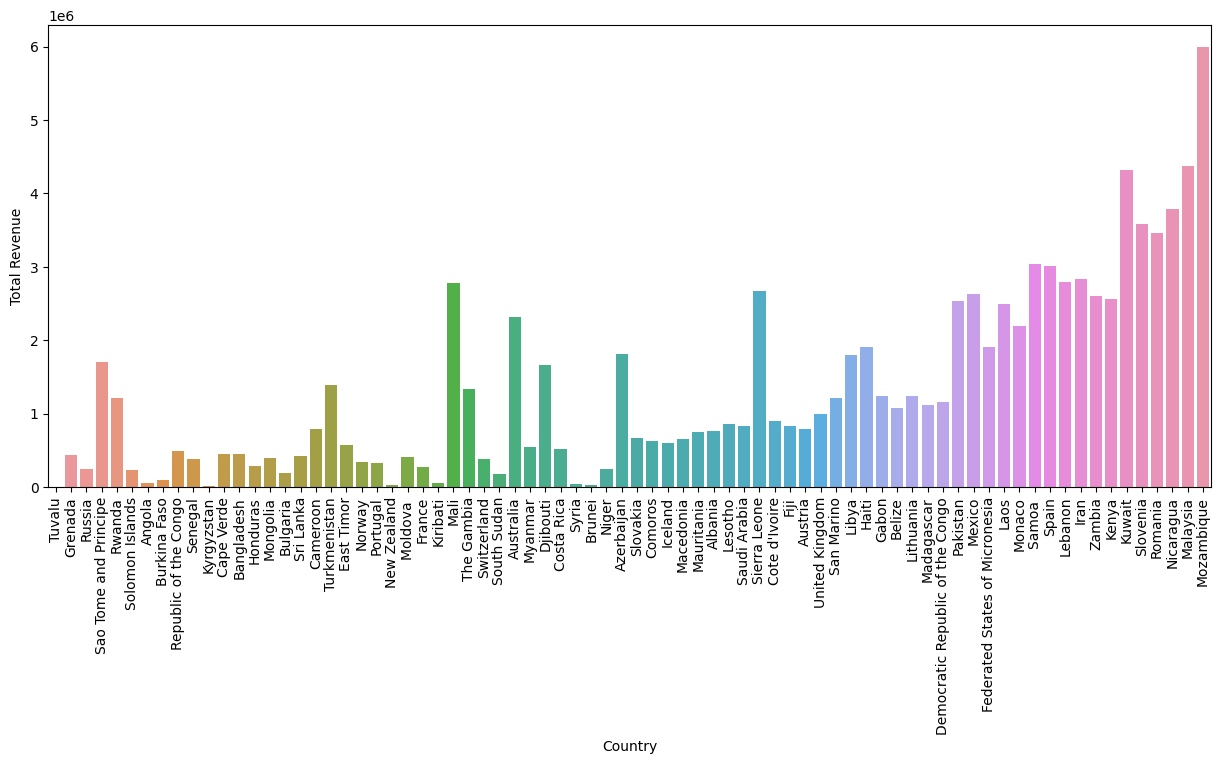

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x='Country', y='Total Revenue', data=data, ci=None)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()

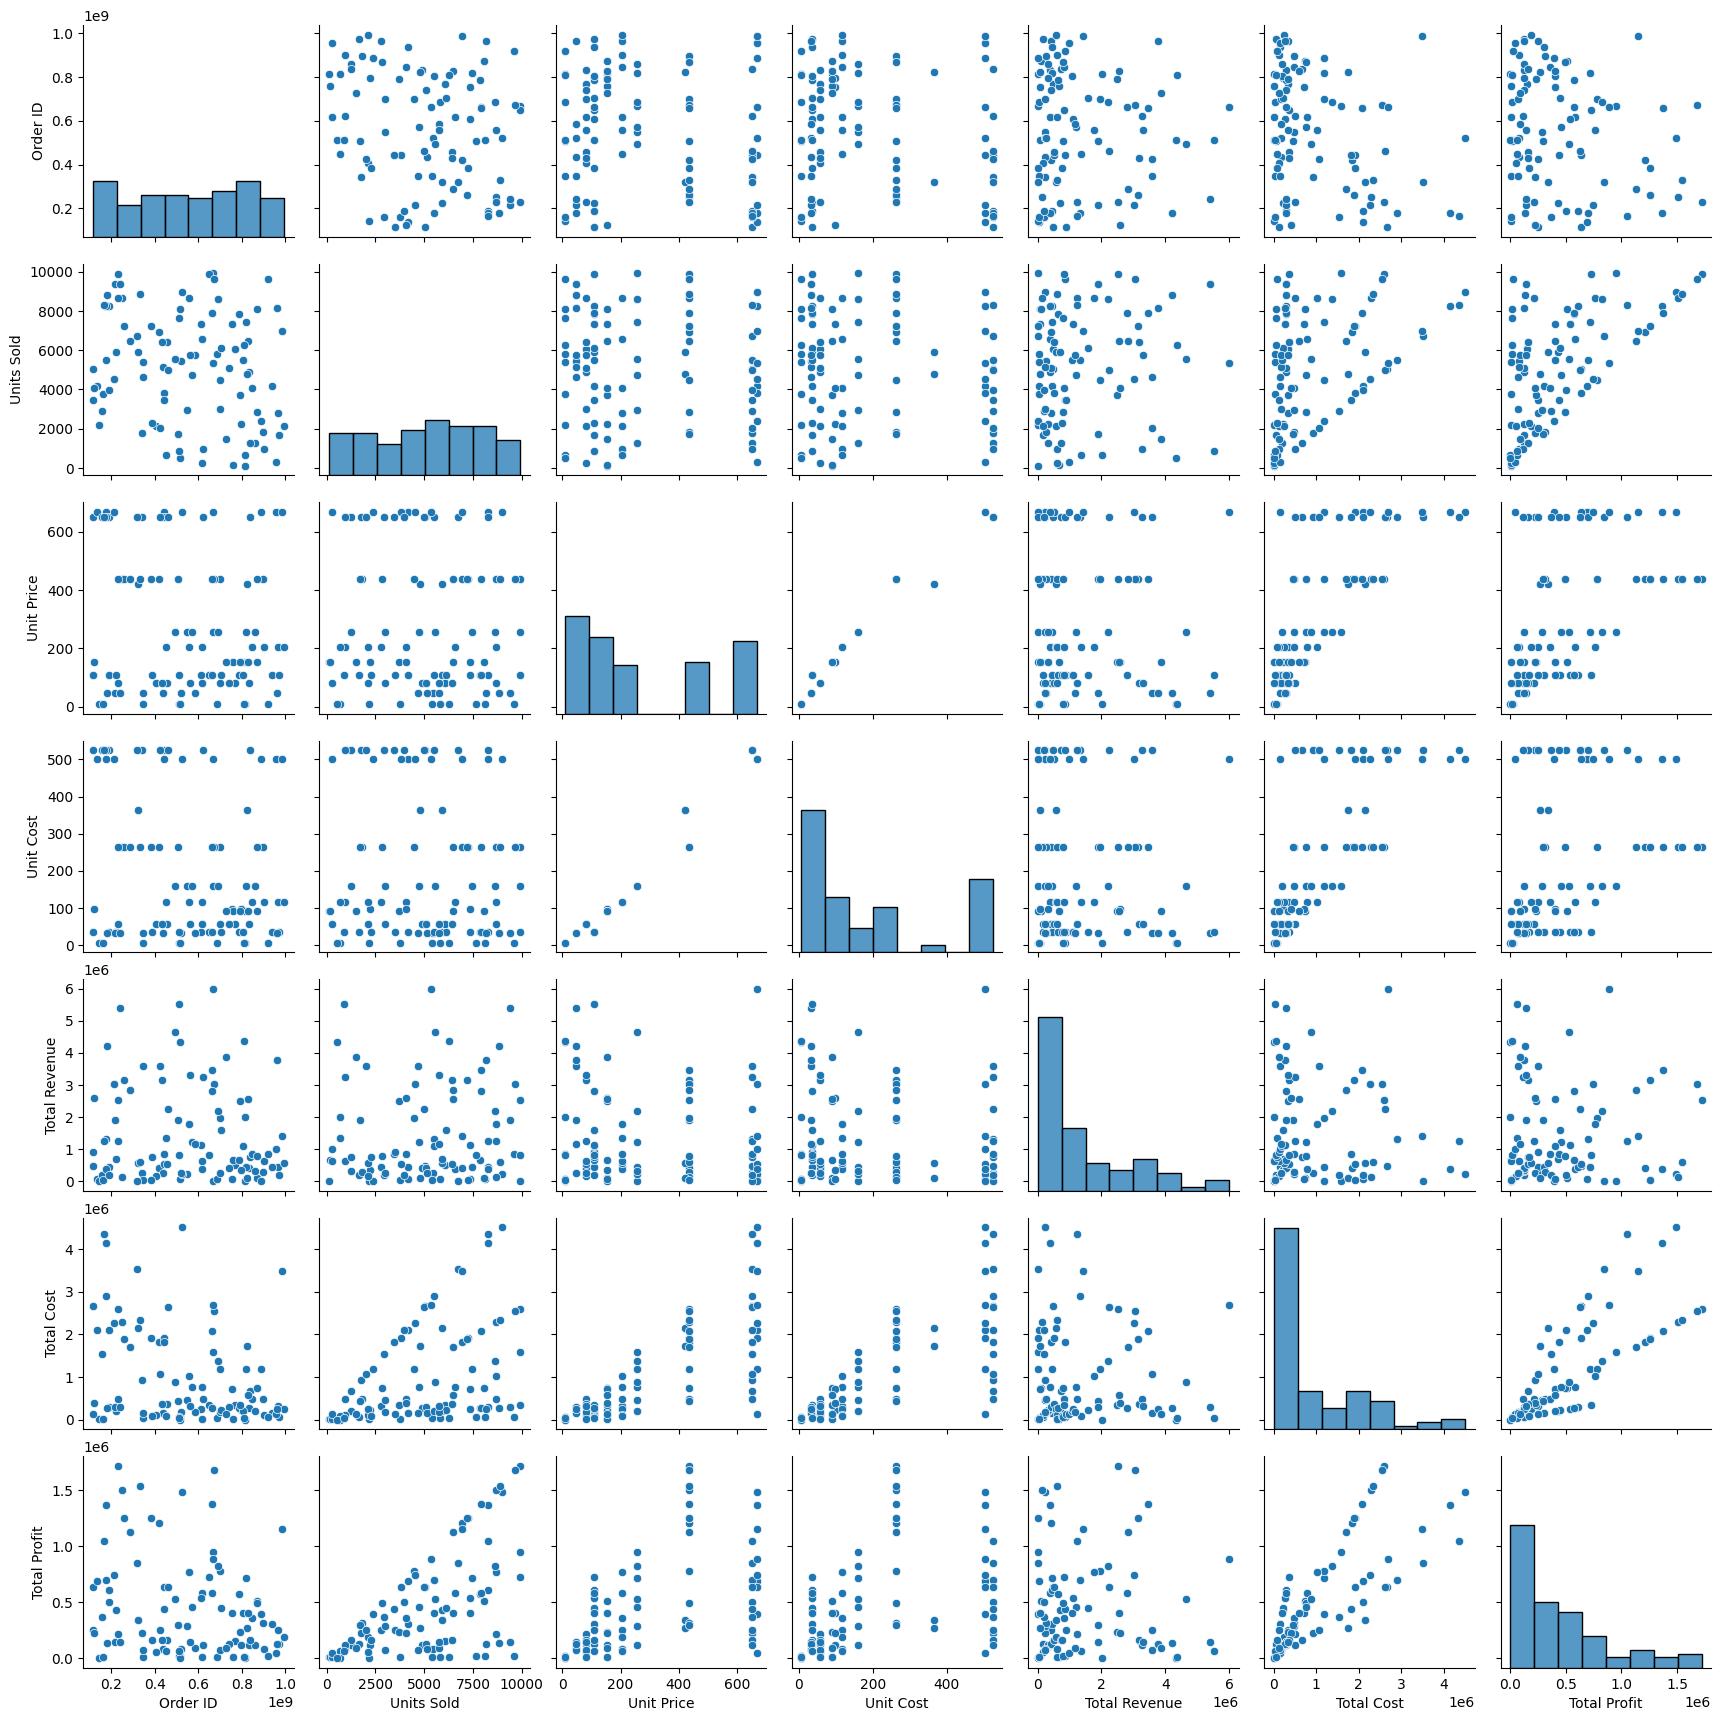

In [ ]:
sns.pairplot(data)

<ipython-input-46-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

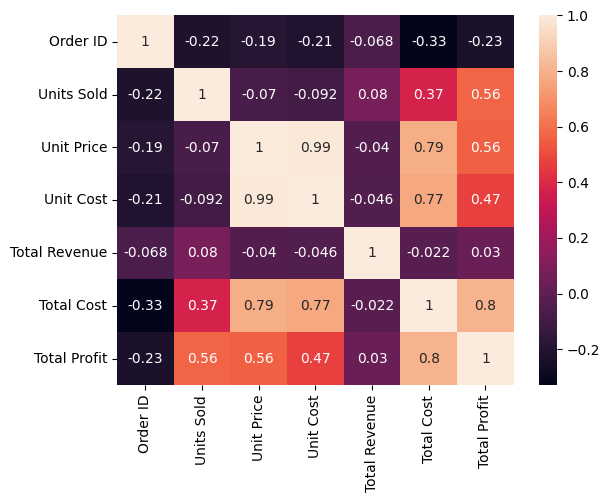

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
sns.lmplot(x='Units Sold',y='Total Profit',data=data)
plt.show()

In [ ]:
x=np.array(df['Total Profit']).reshape(-1,1)
y=np.array(df['Units Sold']).reshape(-1,1)

regression_model=LinearRegression()
regression_model.fit(x,y)

slope=regression_model.coef_[0]
intercept=regression_model.intercept_

intersection_point=-intercept/slope

print("Slope:", slope)
print("Intercept:", intercept)
print("Intersection Point:", intersection_point)

y_pred=regression_model.predict(x)

Slope: [88.59479185]
Intercept: [-12695.01091023]
Intersection Point: [143.29297067]


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y,y_pred=y_pred)
mse = mean_squared_error(y_true=y,y_pred=y_pred)
rmse = mean_squared_error(y_true=y,y_pred=y_pred,squared=False)

print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 1906.2579592104742
MSE: 5267032.924392032
RMSE: 2295.0017264464163


In [ ]:

x=data['Units Sold']
y=data['Total Revenue']
x = x.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Mean Squared Error: 1998506585267.2332
Root Mean Squared Error: 1413685.46192823
R-squared: 0.09724095541865552


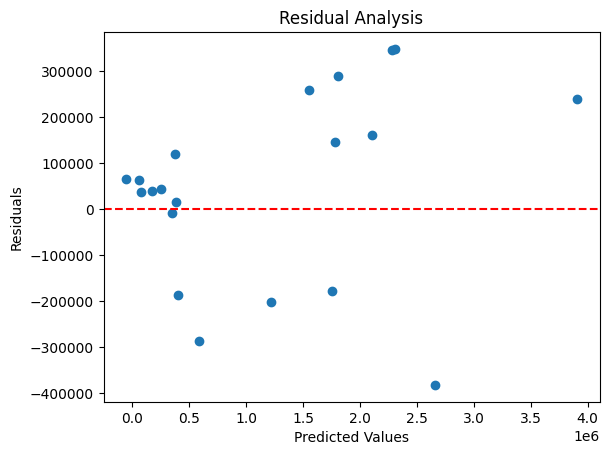

Mean Squared Error: 42981502184.551506
Root Mean Squared Error: 207319.80654185338
R-squared: 0.9671969592563937
                            OLS Regression Results                            
Dep. Variable:             Total Cost   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     2298.
Date:                Tue, 29 Aug 2023   Prob (F-statistic):           1.24e-59
Time:                        13:57:33   Log-Likelihood:                -1085.7
No. Observations:                  80   AIC:                             2175.
Df Residuals:                      78   BIC:                             2180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [ ]:
import statsmodels.api as sm


x = data['Total Revenue'].values.reshape(-1, 1)
y = data['Total Cost']

x = sm.add_constant(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train)
results = model.fit()

predictions = results.predict(X_test)


mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
r2 = r2_score(y_test, predictions)

residuals = y_test - predictions
plt.scatter(predictions, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print(results.summary())